# Edit distance problem question with example:
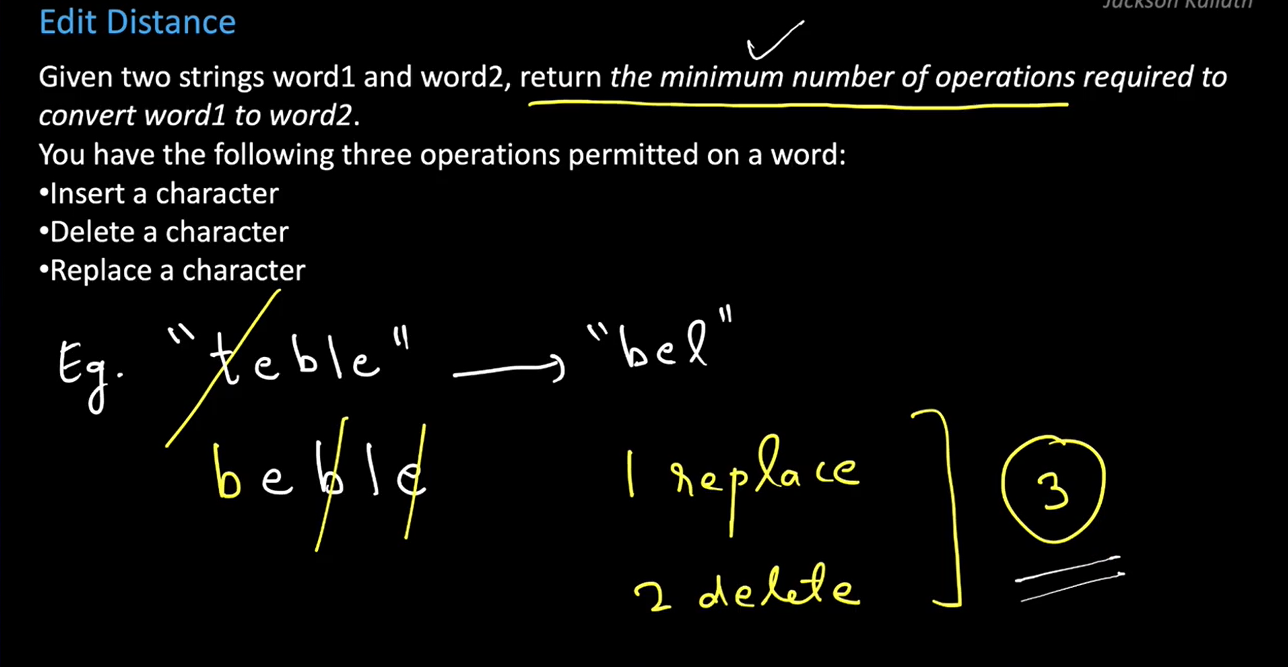
### as here in example word1= teble and wrod2 = bel 
### so for converting wrod1 to wrod2 with minimum number of operations would be :
- word1=  beble   [replacing 't' with 'b']
- word1=  bele   [delete 'b']
- word1=  bel   [delete 'e']  
- henace word1 = bel = word2  [need minimum 3 operations ; 1 replacement & 2 deletion operation ]
# Edit distance problem sidenote:
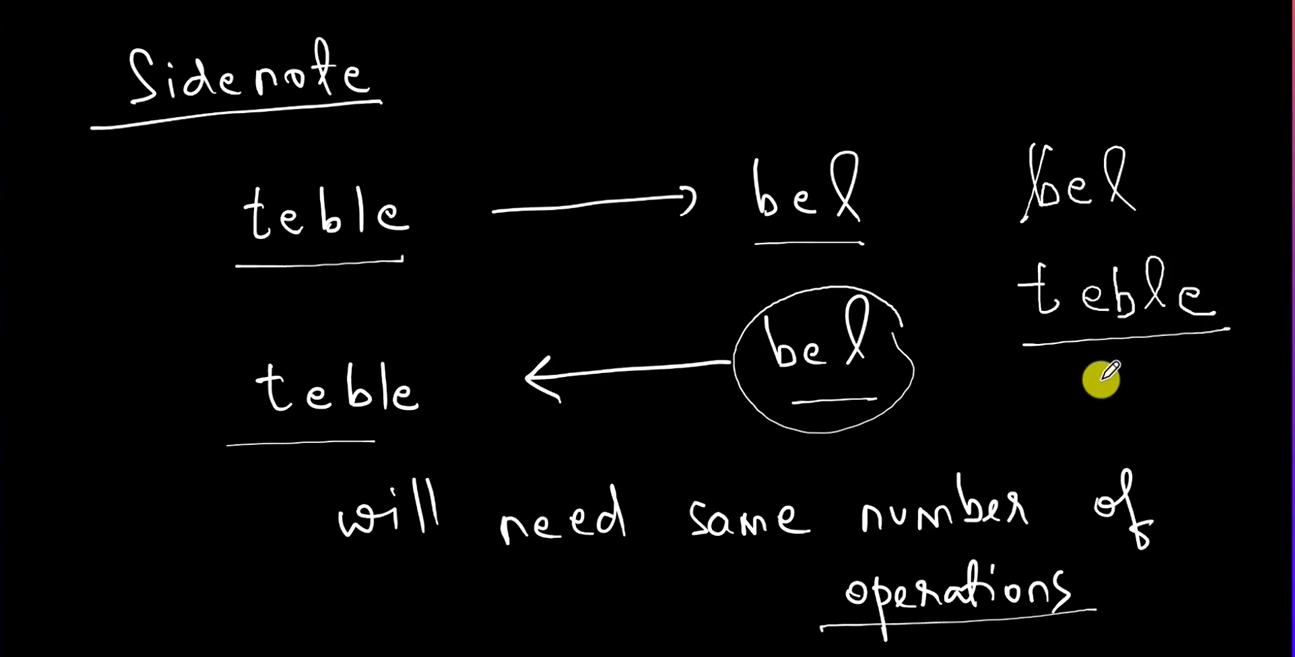
### here important things to understand is that if converting word1 to word2 takes minimum 3 operations then converting word2 back to word1 would also take three operations [type of operations can be change]
# Edit distance problem clarifying question:
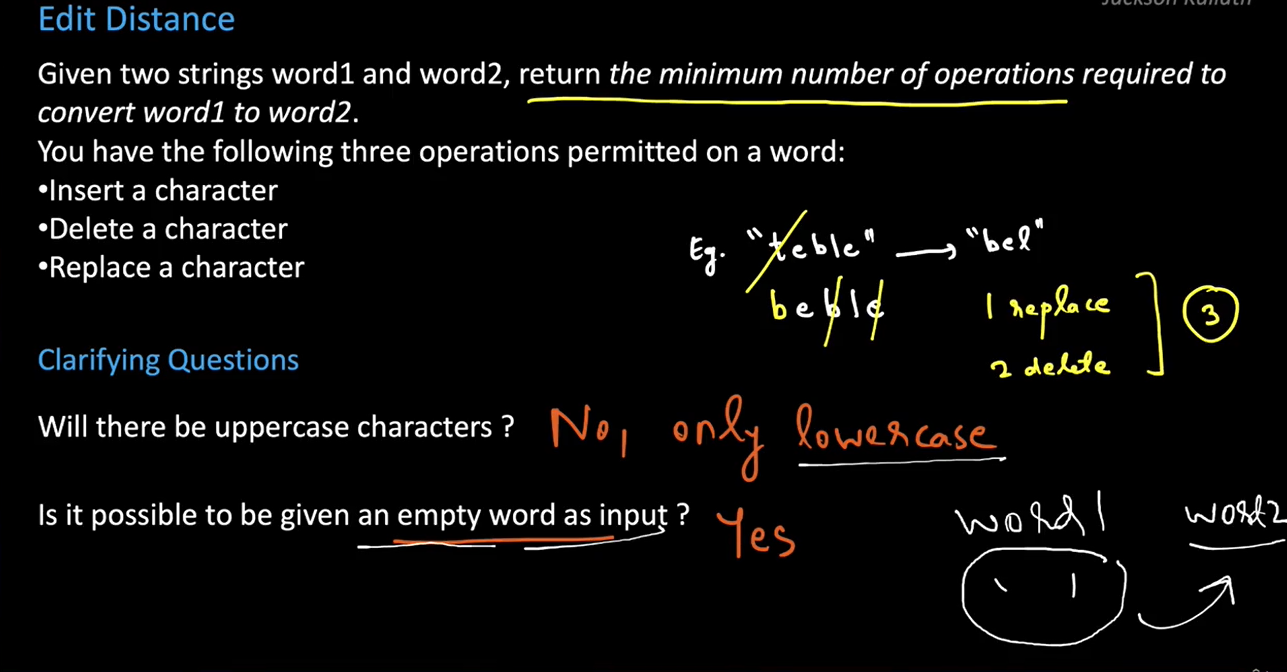
# Edit distance problem test-cases:
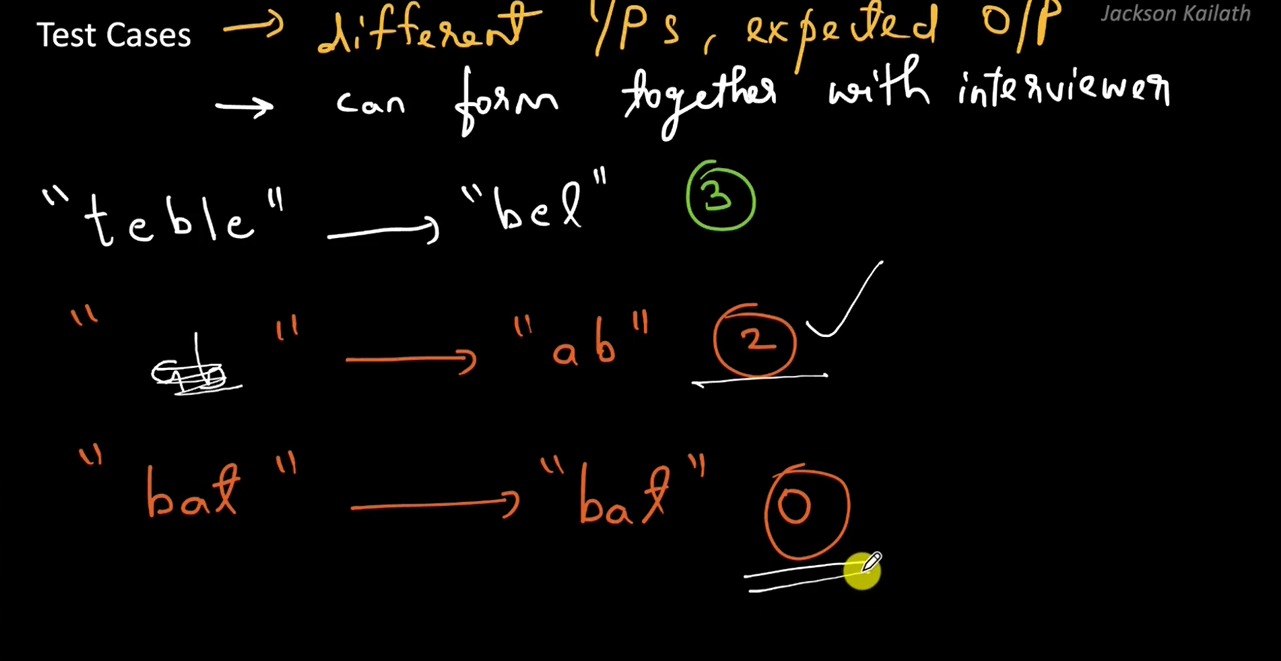
# Coding Exercise: Edit Distance
### Given two strings word1 and word2, return the minimum number of operations required to convert word1 to word2.

### You have the following three operations permitted on a word:

- Insert a character

- Delete a character

- Replace a character

### Example: 

- Input: word1 = "hodse", word2 = "dos"
- Output: 3
### Explanation: 
- hodse -> dodse (replace 'h' with 'd')
- dodse -> dose (remove 'd')
- dose -> dos (remove 'e')
# Why this problem(EDit distance) is a type of or variations of LCS problem [how this particular problem has DP-features]:
### as we know that in the LCS problem there're scnerios while traversing over two strings:
### if chars on indexes of both string matched (equal) then we will move both the indexes to the next.
### if chars on indexes of both string NOT matched (NOT equal) then we will move one of the index to the next while remain other index of string same(constant)    or we w'll do the vice-versa of this.

### similarly here in Edit distance problem as well there're scenerios while traversing over two strings:
### if chars on indexes of both string matched (equal) then No operations needed.
### if chars on indexes of both string NOT matched (NOTequal) then we will check possibilities among all 3 operations :-
1. delete operation [deleting char on current ongoing index of word1]
2. insert operation [inserting char on current ongoing index of word1] 
1. replace operation [replace char(based on char of word2) on current ongoing index of word1] 


### this edit distance problem also has optimal sub-structure feature of DP as here we're asked to find minimum operations to convert string1 to string2 or word1 to word2
### it will definately has overlapping-subproblems as we had in the case of LCS problem
### hence this problem can be solve using dynamic-programming
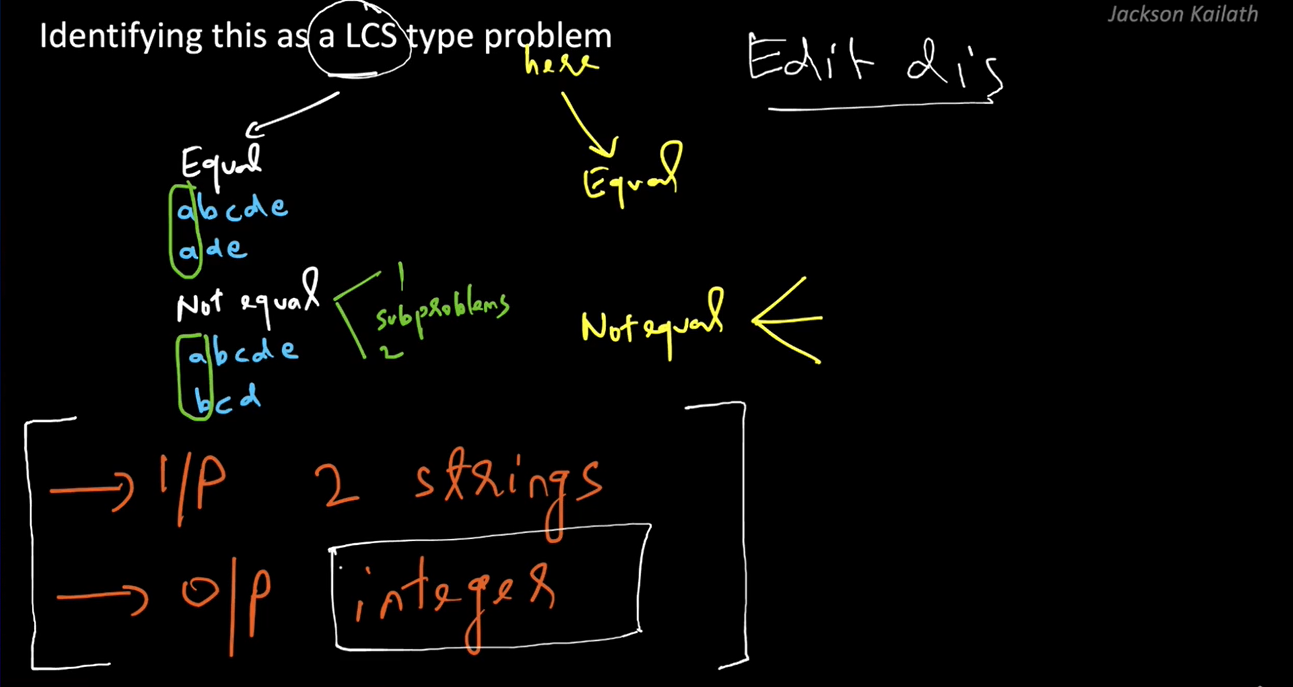


# Edit distance problem Tabulation(bottom-up)-approach:
### we have to contruct 2-d dp_table(tabulation) with rows and colmn like this : (n+1, m+1)
### and here specifying cell in the dp_table is subproblem where we have to convert 'te' into 'be'
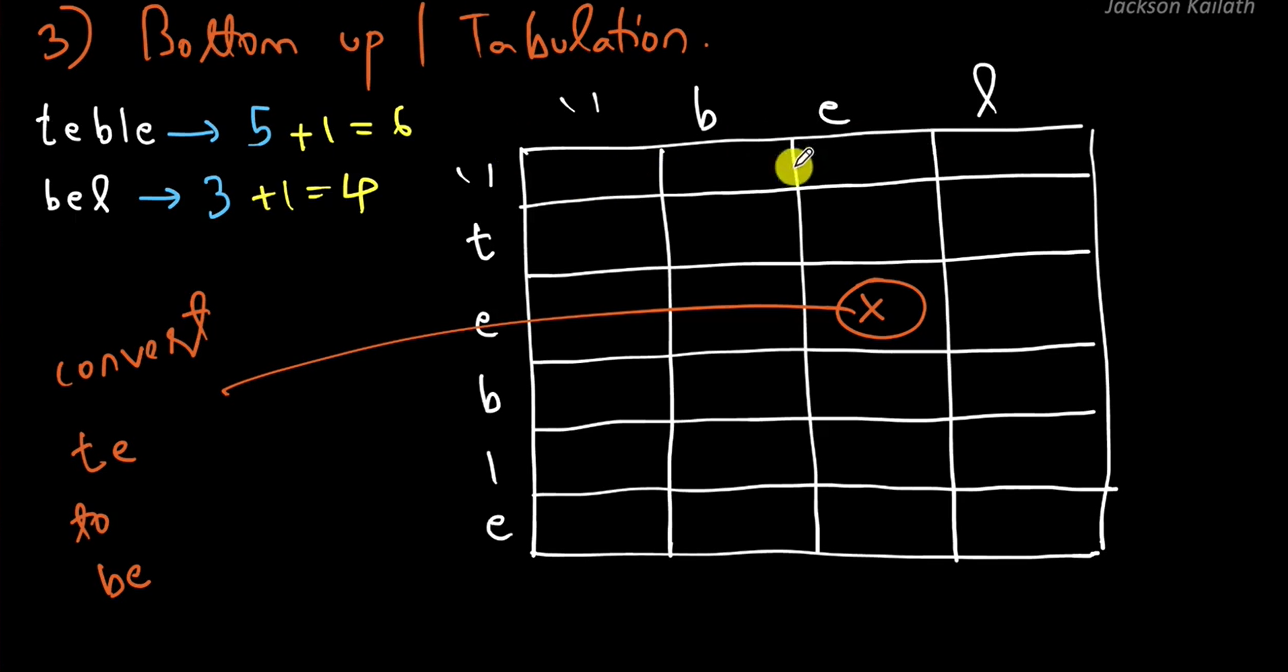
### here first-column is base-conditioned-column where word2 is empty(has zero characters) and word1 has some extra characters that we have to delete to match-up with word2  [base-condition: if (index2>m-1) then return n-index1]

### here first-row is base-conditioned-row where word1 is empty(has zero characters) and word2 has some extra characters that we have to insert into the word1 to match-up with word2  [base-condition: if (index1>n-1) then return m-index2]
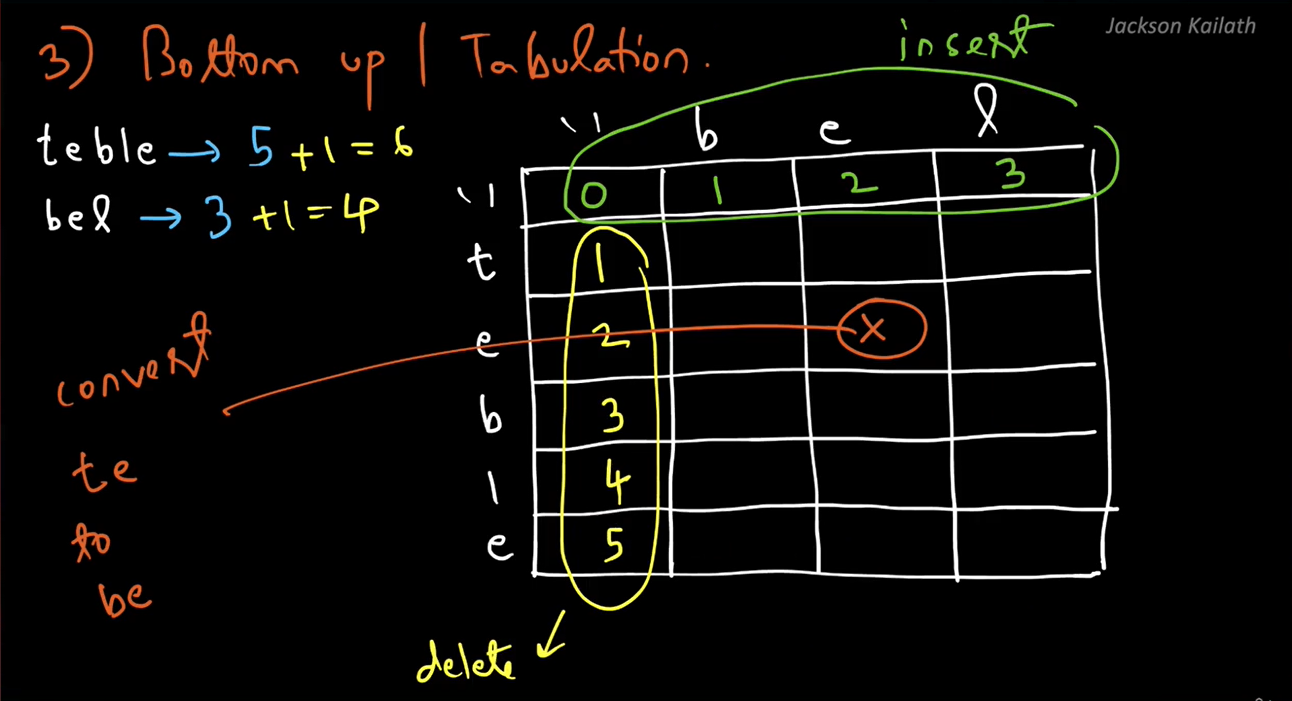

###  Formulas to fill the each cells of 2-d Dp_table(tabulation):

### if chars are equal on indexes of both word1 & word2 :-
- concept:  we have to move both indexes i & j to the next without adding one( as none of the three operation needed)
- formula for dp_table(when word1[i-1]==word[j-1]) = dp[i-1][j-1]   //top-left element or diagonal cell
### if chars are NOT equal on indexes of both word1 & word2 :-

### Deletion-case:-
- concept:  we have to move i(index of word1) to the next while remaining j(index of word2) constant with adding 1
- formula for dp_table(when word1[i-1] != word[j-1]) = 1 + dp[i-1][j]  //top cell

### Insertion-case:-
- concept:  we have to move j(index of word2) to the next while remaining i(index of word1) constant with adding 1
- formula for dp_table(when word1[i-1] != word[j-1]) = 1 + dp[i][j-1]  //left or adjacent cell

### Replacement-case:-
- concept:  we have to move both j(index of word2) i(index of word1) to the next  with adding 1
- formula for dp_table(when word1[i-1] != word[j-1]) = 1 + dp[i-1][j-1]  //top-left or diagonal cell

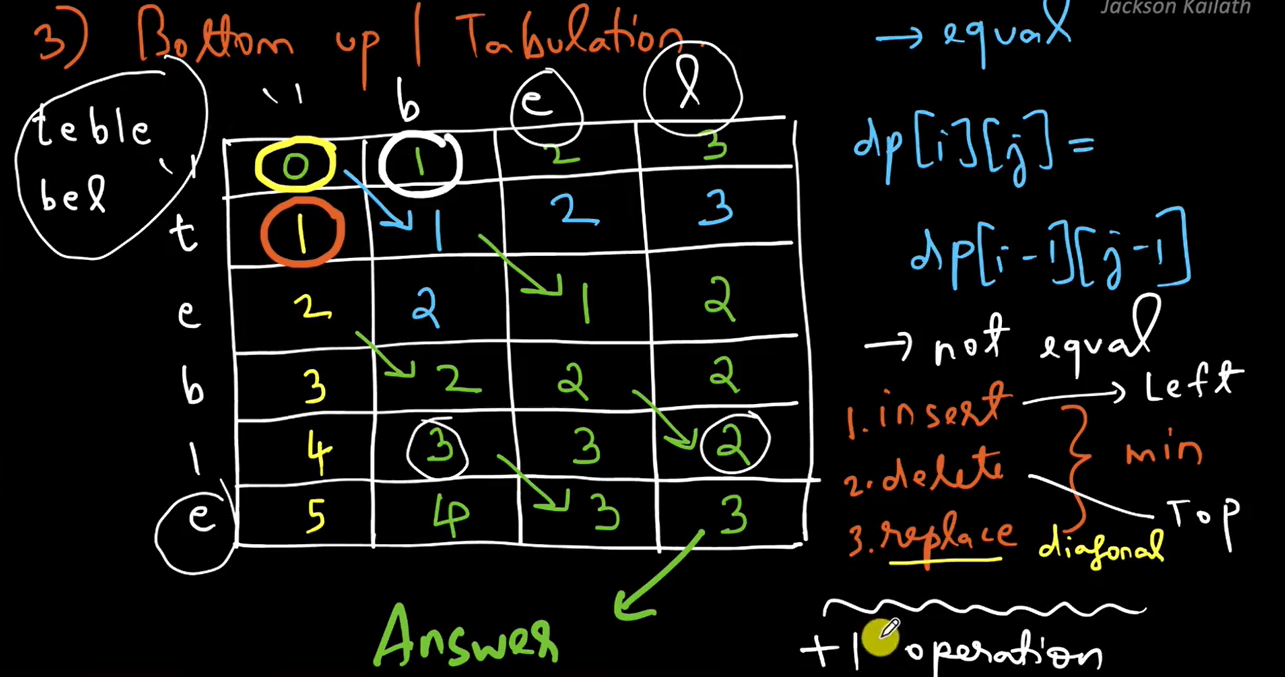
### and major solution to the problem at hand will be the value at far-right-bottom ; dp[n][m]

# Edit distance problem Tabulation(bottom-up)-approach[ complexity-analysis]:
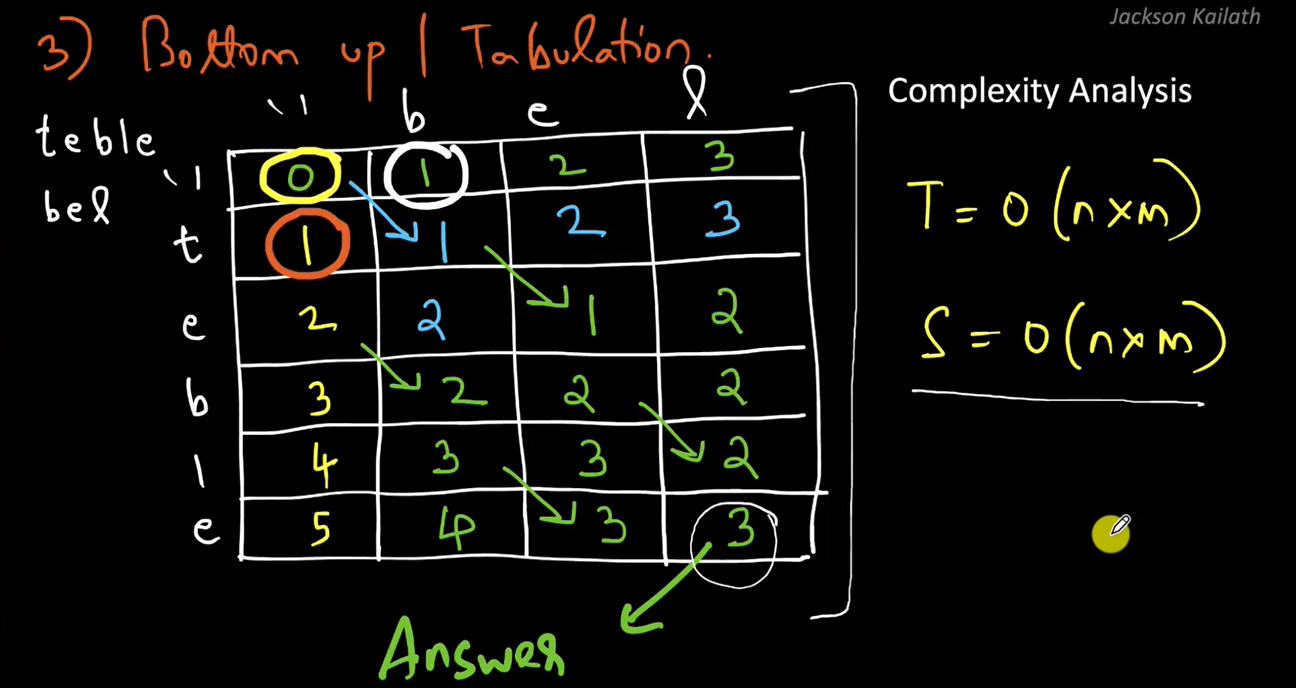
# Edit distance problem Tabulation(bottom-up)-approach[ code implementation]:
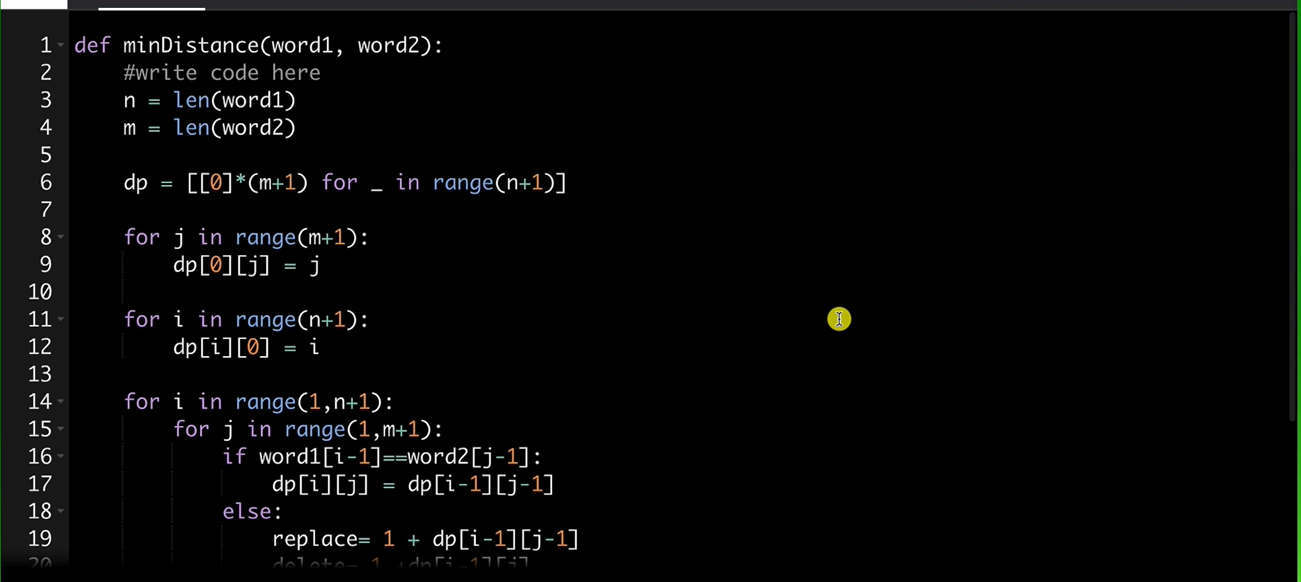
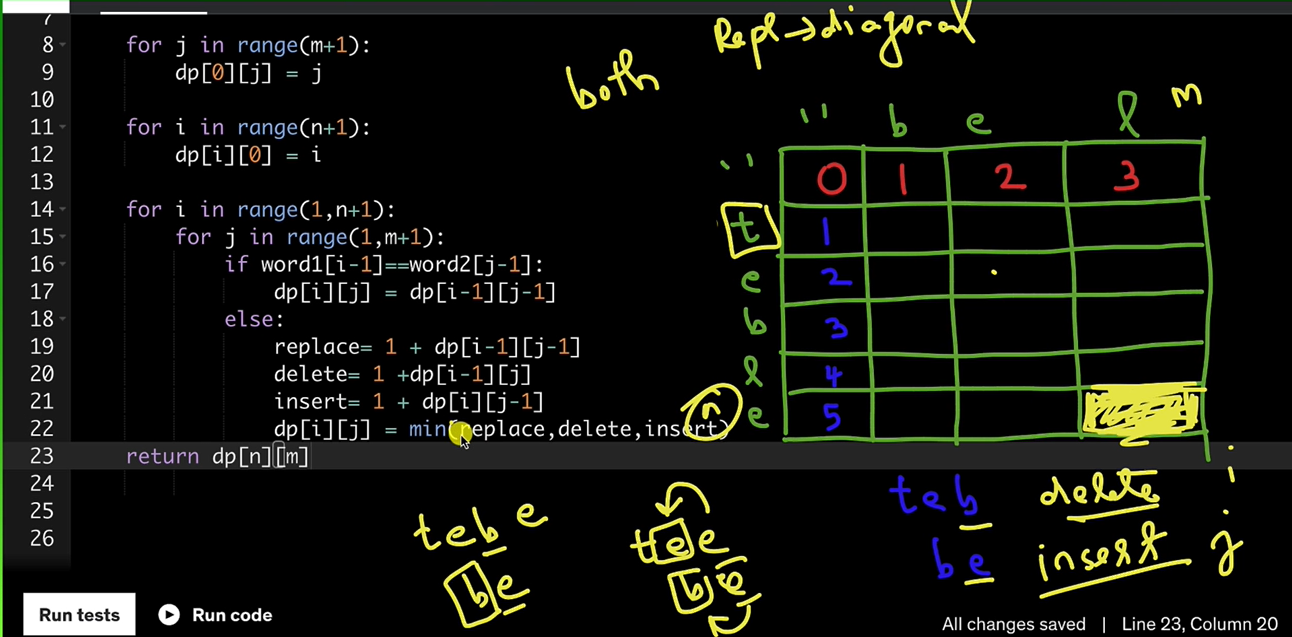

In [2]:
# code implementation for solving edit_ min distance problem through the tabulation(bottom-up) approach:
def EditDistance(word1, word2):
    n = len(word1)  # length hof word1
    m = len(word2)  # length of word2
    # constructing 2-d dp_table of rows and column = (length of word1+1 and length of word2+1) =(n+1,m+1)
    dp = [[0]*(m+1) for _ in range(n+1)]
# here we filling-up the dp_table cell's value iteratively 

# here we;re filling up base-conditioned colmn of dp_table
    for i in range(n+1):
        dp[i][0] = i
# here we;re filling up base-conditioned row of dp_table
    for j in range(m+1):
        dp[0][j] = j
# here after filled-up based conditioned row & colm , we will start filling up values from row at index =1 and colm at index =1
    for i in range(1,n+1):  # for row
        for j in range(1,m+1):  # for colmn
            # when chars at both indexes of word1 & word2 equal 
            if word1[i-1]==word2[j-1]: 
                dp[i][j] = dp[i-1][j-1]  # value of current cell of dp_table equals to the value of diagonal cell (top-left cell)
            else: # when chars at both indexes of word1 & word2 NOT equal
                replace = 1 + dp[i-1][j-1] # value of current cell of dp_table equals to the value of diagonal cell (top-left cell) +1
                delete = 1 + dp[i-1][j] # value of current cell of dp_table equals to the value of top cell +1
                insert = 1+ dp[i][j-1]  # value of current cell of dp_table equals to the value of left or adjacnet cell +1
                dp[i][j] = min(delete,replace,insert) # storing only minimum value among above three operational-scenerios   
    return dp[n][m]    #and major solution to the problem at hand will be the value at far-right-bottom ; dp[n][m]        

# example usage :
text_1 ="teble"
text_2 ="bel"

print(EditDistance(text_1,text_2))  # should be 3

txt_1 ="hodse"
txt_2 ="dos"

print(EditDistance(txt_1,txt_2))

3
3


In [4]:
def minDistance(word1, word2):
    n = len(word1)
    m = len(word2)

    dp = [[0]*(m+1) for _ in range(n+1)]

    for i in range(n+1):
        dp[i][0] = i

    for j in range(m+1):
        dp[0][j] = j

    for i in range(1,n+1):
        for j in range(1,m+1):
            if word1[i-1]==word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                replace = 1 + dp[i-1][j-1]
                delete = 1 + dp[i-1][j]
                insert = 1+ dp[i][j-1]
                dp[i][j] = min(delete,replace,insert)    
    return dp[n][m]            


# Edit distance problem SPACE optimised Tabulation(bottom-up)-approach[ complexity-analysis]:
### only need two arrays denoting the current-row and last/prev-row of size min(n+1,m+1) to filling-up current cell at correponding indexes  
### scpace complexity will be optimised from O(n*m) to the : O( min(n,m) )   
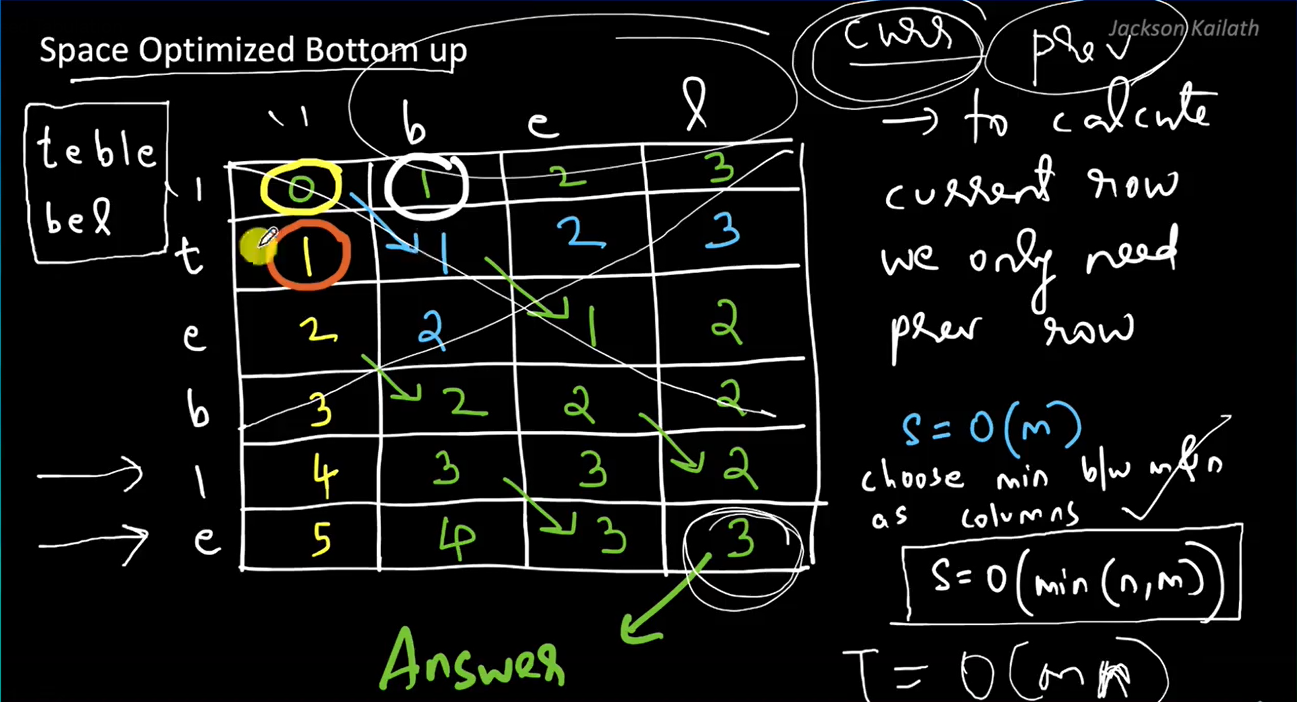
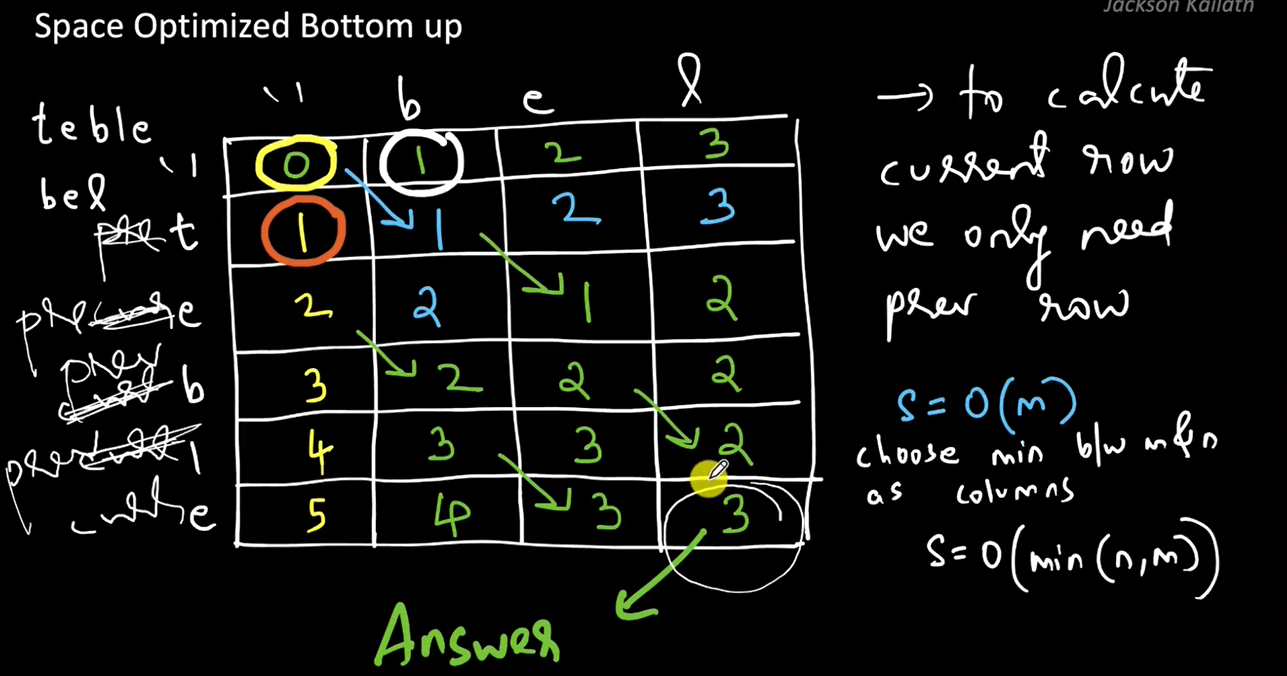
### answer : major solution to the problem at hand would be equals to the value of last-cell of last prev-row instead of last curr-row[remember this] ; prev[m]   
# Edit distance problem SPACE optimised Tabulation(bottom-up)-approach[ code implementation]:
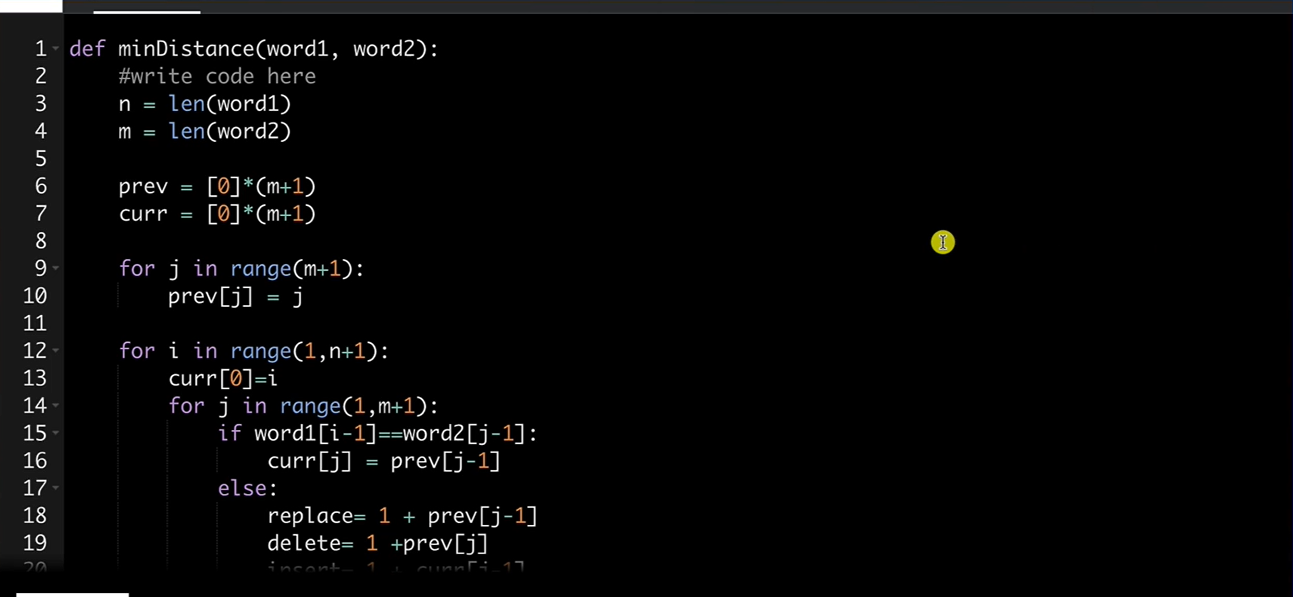
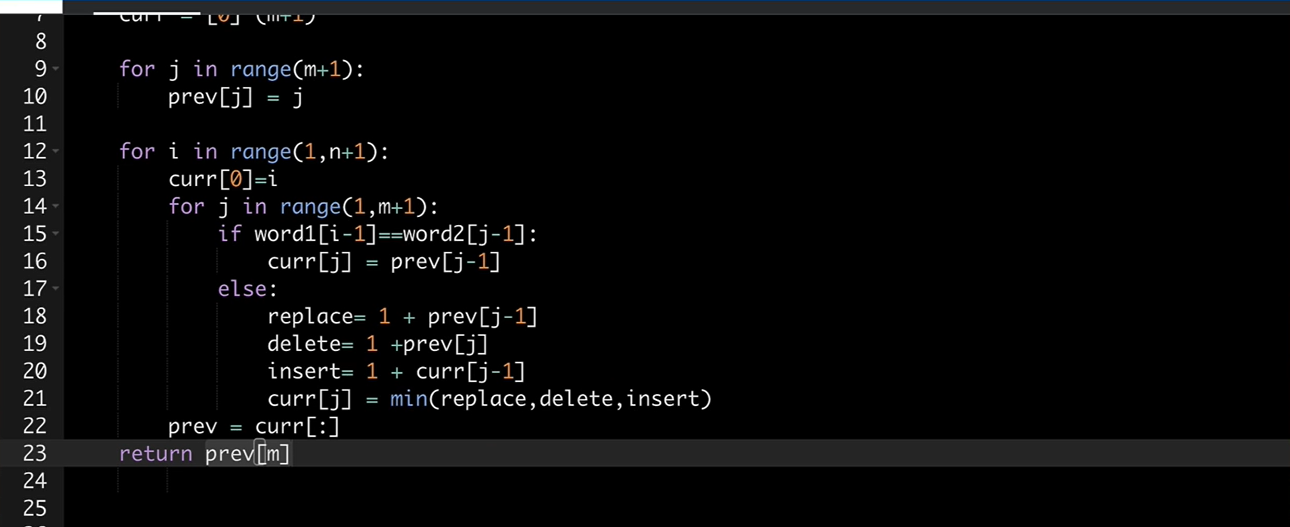

In [5]:
# code implementation for solving edit_ min distance problem through the space optimised tabulation(bottom-up) approach:
def EditDistance(word1, word2):
    n = len(word1)  # length hof word1
    m = len(word2)  # length of word2
    # instead of constructing 2-d dp_table of rows and column = (length of word1+1 and length of word2+1) =(n+1,m+1)
    #we're here construcitng the two 1-d arrays denoting prev-row and curr-row of size m+1 
    prev = [0]*(m+1)  # intializng all with zero first
    curr = [0]*(m+1)  # intializng all with zero first 
     
# here we filling-up the dp_table cell's value iteratively 

# here we;re filling up base-conditioned row of dp_table   //which is here in the case would be zeroth-prev row 
    for j in range(m+1):
        prev[j] = j
# here after filled-up based conditioned-row(zeroth-prev row) , now we will start filling up values from row at index =1 ;
# while fiiling each curr row's cell we have to fill the zeroth column base-case conditioned values
    for i in range(1,n+1):  # for row
        curr[0] = i  #filled the zeroth column base-case conditioned values  for each incomming curr-row
        for j in range(1,m+1):  # for colmn
            # when chars at both indexes of word1 & word2 equal 
            if word1[i-1]==word2[j-1]: 
                curr[j] = prev[j-1]  # value of current cell of dp_table equals to the value of diagonal cell (top-left cell) 
                                    # value of cell in the curr-row would be equal to the top-left-cell [diagonal cell at prev-row]
            else: # when chars at both indexes of word1 & word2 NOT equal
                replace = 1 + prev[j-1] # value of current cell of dp_table equals to the value of diagonal cell (top-left cell)  +1
                                        # value of cell in the curr-row would be equal to the top-left-cell [diagonal cell at prev-row]  +1
                delete = 1 + prev[j] # value of current cell of dp_table equals to the value of top cell  +1
                                     # value of cell in the curr-row would be equal to the top-cell at prev-row  +1
                insert = 1+ curr[j-1]  # value of current cell of dp_table equals to the value of left or adjacnet cell  +1
                                     # value of cell in the curr-row would be equal to the adjacent-left cell at curr-row  +1 
                curr[j] = min(delete,replace,insert) # storing only minimum value among above three operational-scenerios
        # swapping : each time after filled-up all values in curr-row  we have to copying the whole curr-row values to the prev-row 
        prev = curr[:]   
    return prev[m]   # major solution to the problem at hand would be equals to the value of last-cell of last prev-row instead of last curr-row        
                    #[remember this] ; prev[m]  instead of curr[m]
# example usage :
text_1 ="teble"
text_2 ="bel"

print(EditDistance(text_1,text_2))  # should be 3

txt_1 ="hodse"
txt_2 ="dos"

print(EditDistance(txt_1,txt_2))

3
3


In [6]:
def minDistance(word1, word2):
    n = len(word1)
    m = len(word2)

    prev = [0]*(m+1) 
    curr = [0]*(m+1)

    for j in range(m+1):
        prev[j] = j

    for i in range(1,n+1):
        curr[0] = i
        for j in range(1,m+1):
            if word1[i-1]==word2[j-1]:
                curr[j] = prev[j-1]
            else:
                replace = 1 + prev[j-1]
                delete = 1 + prev[j]
                insert = 1+ curr[j-1]
                curr[j] = min(delete,replace,insert)    
        prev = curr[:]        
    return prev[m]            
